# Homework 04 - Numpy

### Exercise 1 - Terminology

Describe the following terms with your own words:

***numpy array:*** matrix 

***broadcasting:*** the way numpy treats arrays of different shapes in arithmetic operations --> smaller array will be duplicated to the size of larger array

Answer the following questions:

***What is the difference between a Python list and a Numpy array?***
arrays can be multiplied by one number through broadcasting
on lists you can't do the same mathematical operation; 

***How can you avoid using loops or list comprehensions when working with Numpy?***
by using arrays 


***Give different examples of usages of square brackets `[]` in Python and Numpy? Describe at least two completely different ones!***

In Numpy [] are used for creating arrays and to select indeces or rows/columns from arrays

In Python [] are used to create lists and for indexing

***Give different examples of usages of round brackets `()` in Python and Numpy? Describe at least two completely different ones! (Bonus: give a third example not covered in the lecture until now!)***

() are used for calling functions or defining groups 
Defining groups with () creates tuples (ordered collection which cannot be changed in lenght or in its element values)

In [52]:
import numpy as np
# [] in numpy
a = np.array([
[1,2,3],
[1,2,3],
[1,2,3]
])
a[:,0] #selects the first column
# [] in python
b = [1,2,3,4] #creates a list
b[2] #selects the 3 element of the list
a

c =("a","b","c")
d = (10,20,30)
e = range(5)

a

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### Exercise 2 - rotate and plot points in 2D

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

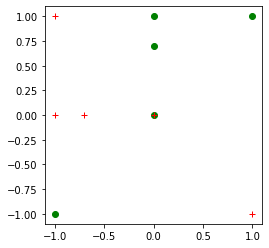

In [5]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T


angle = np.radians(90)
rotation_matrix = ([np.cos(angle), -np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]) 
points_rotated = rotation_matrix@points

plt.plot(*points, 'o', label = "original points", color = 'green')
plt.plot(*points_rotated, '+', label = "rotated points", color = 'red')
plt.gca().set_aspect('equal')

The result should like like this:

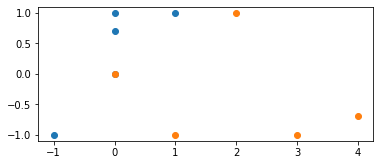

In [60]:
plt.plot(*points, 'o', label='original points')
plt.plot(*points_rotated, 'o', label='rotated points')
plt.gca().set_aspect('equal')

### Exercise 3 - Flatten the curve

Copy the function `new_infections(t, k)` from last week's homework (exercise 3) and re-do the exercise using Numpy arrays instead of Python lists.

What needs to be changed in the function `new_infections(t, k)` to make this work?

<function matplotlib.pyplot.show(*args, **kw)>

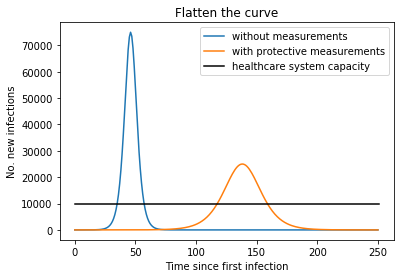

In [71]:
import math

P = 1000000
i = 1
k = 3 / (P*10)
t = np.arange(251)

y = 10000 #healthcare system capacity

def exp(k,P,t):
    e = np.exp(-k * P * t)
    return e 

e = exp(k,P,t)

def new_infections(e, k):
    infections = e* k * P**2 * (-1+(P/i))/(1+e*(-1+(P/i)))**2
    return infections

infections = new_infections(e, k)

k2 = 2/(P*20)
e2 = exp(k2,P,t)

infections2 = new_infections(e2,k2)

plt.plot(t,infections, label = "without measurements")
plt.plot(t,infections2, label = "with protective measurements")
plt.xlabel("Time since first infection")
plt.ylabel("No. new infections")
plt.title("Flatten the curve")
plt.plot((0,251),(y,y), 'k-', label = "healthcare system capacity")
plt.legend()
plt.show

### Exercise 4 - Mean of random numbers

Generate 100 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,100$ and plot this list too.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2 to 5 different ways*** to look up what a numpy function does!

google 
use ??np in the notebook
search in the numpy manual
read a book about numpy 

Note: To solve this exercise, a list comprehension is necessary. Pure Numpy is faster, but probably not a good idea here.

[0.4762230260583734]


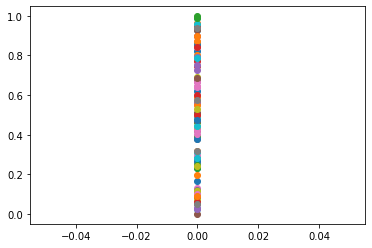

In [18]:
rng = np.random.default_rng()
random_values = [1*rng.random(100)]
plt.plot(random_values, 'o')
random_value = range(1,100)
random_values_mean = [np.mean(random_values) for random_value in random_values]
plt.plot(random_values_mean, 'o')
print(random_values_mean)


In [32]:
from numpy.random import seed
from numpy.random import rand

import random
from random import random
# seed random number generator
seed(1)
print(rand(100))

random_values_mean = np.mean(random_values[i] for i in range(1,100))
        




[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
 2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01
 4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01
 8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
 8.76389152e-01 8.94606664e-01 8.50442114e-02 3.90547832e-02
 1.69830420e-01 8.78142503e-01 9.83468338e-02 4.21107625e-01
 9.57889530e-01 5.33165285e-01 6.91877114e-01 3.15515631e-01
 6.86500928e-01 8.34625672e-01 1.82882773e-02 7.50144315e-01
 9.88861089e-01 7.48165654e-01 2.80443992e-01 7.89279328e-01
 1.03226007e-01 4.47893526e-01 9.08595503e-01 2.93614148e-01
 2.87775339e-01 1.30028572e-01 1.93669579e-02 6.78835533e-01
 2.11628116e-01 2.65546659e-01 4.91573159e-01 5.33625451e-02
 5.74117605e-01 1.46728575e-01 5.89305537e-01 6.99758360e-01
 1.02334429e-01 4.14055988e-01 6.94400158e-01 4.14179270e-01
 4.99534589e-02 5.358964

TypeError: unsupported operand type(s) for /: 'generator' and 'int'